## 1 Assignment 1
**Instructions:** This exercise should be done “by hand”, that is, not using Python. All nec-essary calculations should be included in the submission, as well as brief explanations of what you do. 

Consider the following 7 two-dimensional observations:

                Observation i

axis|i =1|i =2|i =3|i =4|i =5|i =6|i =7
-|-|-|-|-|-|-|-
xi1|1|1|1|5|2|6|4
xi2|4|3|2|1|3|2|1


Points| Euclidean Distance
-|-
(1,2)|1
(1,3)|2
(1,4)|5
(1,5)|1.41
(1,6)|5.38
(1,7)|4.24
(2,3)|1
(2,4)|4.47
(2,5)|1
(2,6)|5.09
(2,7)|3.60
(3,4)|4.12
(3,5)|1.41
(3,6)|5
(3,7)|3.16
(4,5)|3.60
(4,6)|1.41
(4,7)|1
(5,6)|4.12
(5,7)|2.82
(6,7)|2.23

#### 1. Plot the observations in a two-dimensional graph.

<img src='scatter_main.jpeg' style='width:500px;height:500px'>

In [1]:
#import matplotlib.pyplot as plt
#%matplotlib inline#

#plt.scatter([1,1,1,5,2,6,4],[4,3,2,1,3,2,1], c = ['red','green','blue','purple', 'pink','yellow','orange'])
#plt.xlabel('Xi1')
#plt.ylabel('Xi2');

#### 2. Perform K-means clustering with K = 2 using the Euclidean norm. Toss a coin 7 times to initialise the algorithm.
K = 2

Tossing a coin: 1. Head, 2. Head, 3. Head, 4. Tail, 5. Head, 6. Tail, 7. Head


**Stage 1:**

We'll select point 4 & 6 as cluster centroid as Tail was there for 2 points.

M1 = 4 (5,1)
M2 = 6 (6,2)

K1 = {1,2,3,4,5,7}
K2 = {6}

Now we'll take average of cluster points.

M1 = (14/6,14/6) = (2.33,2.33)
M2 = (6,2)

**Stage 2:**
M1 = (2.33,2.33)
M2 = (6,2)

K1 = {1,2,3,5,7}
K2 = {4,6}

Now we'll take average of cluster points.
M1 = (9/5,13/5) = (1.8,2.6)
M2 = (11/2,3/2) = (5.5,1.5)

**Stage 3:**

M1 = (1.8,2.6)
M2 = (5.5,1.5)

K1 = {1,2,3,5}
K2 = {4,6,7}

Now we'll take average of cluster points.
M1 = (5/4,12/4) = (1.25,3)
M2 = (15/3,4/3) = (5,1.33)

**Stage 4:**

M1 = (1.25,3)
M2 = (5,1.33)

K1 = {1,2,3,5}
K2 = {4,6,7}

We'll now stop iterating as since last 2 stages we are getting same points in cluster K1 and K2.

#### 3. Cluster the data using hierarchical clustering with complete linkage and the Euclidean norm. Draw the resulting dendrogram.
**Complete Linkage:** In complete link hierarchical clustering, we merge the members of the clusters in each step which provide the smallest maximum pairwise distance.

We'll start with each point as individual cluster and then merge them based on smallest distance between them.

Dist|1|2|3|4|5|6|7
-|-|-|-|-|-|-|-
1|0|0|0|0|0|0|0
2|1|0|0|0|0|0|0
3|2|1|0|0|0|0|0
4|5|4.47|4.12|0|0|0|0
5|1.41|1|1.41|3.60|0|0|0
6|5.38|5.09|5|1.41|4.12|0|0
7|4.24|3.60|3.16|1|2.82|2.23|0

We'll cluster points {1,2} to begin with as cluster distance is smallest (1).

dist|12|3|4|5|6|7
-|-|-|-|-|-|-
12|0|0|0|0|0|0
3|2|0|0|0|0|0
4|5|4.12|0|0|0|0
5|1.41|1.41|3.60|0|0|0
6|5.38|5|1.41|4.12|0|0
7|4.24|3.16|1|2.82|2.23|0

We'll now merge cluster points {4,7} because that is least distance in matrix (1)

dist|12|3|47|5|6
-|-|-|-|-|-
12|0|0|0|0|0
3|2|0|0|0|0
47|5|4.12|0|0|0
5|1.41|1.41|2.82|0|0
6|5.38|5|1.41|4.12|0

We'll now merge cluster {12}, {5} because that is least distance in matrix (1.41)

dist|125|3|47|6
-|-|-|-|-
125|0|0|0|0
3|2|0|0|0
47|5|4.12|0|0
6|5.38|5|1.41|0

We'll now merge clusters {47},{6} because that is least distance in matrix (1.41)

dist|125|3|476
-|-|-|-
125|0|0|0
3|2|0|0
476|5.38|5|0

We'll now merge clusters {125},{3} because that is least distance in matrix (2)

dist|1253|476
-|-|-
1253|0|0
476|5.38|0

                         ___________________
                         |                 |
                    _____|_____            |
                    |         |            |  
               _____|____     |        ____|_____
               |        |     |        |        |
            ___|___     |     |     ___|___     |
            |     |     |     |     |     |     |
            |     |     |     |     |     |     |
            1     2     5     3     4     7     6

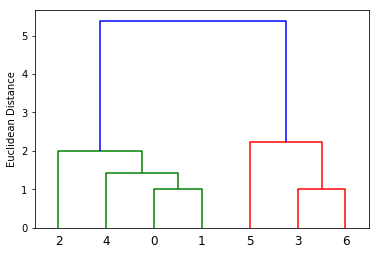

In [2]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clusters = linkage([(1,4),(1,3),(1,2),(5,1),(2,3),(6,2),(4,1)], 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance');

In [3]:
#import math
#x1=1.25
#y1=3
#x2=4
#y2=1

#math.sqrt(((x1-x2)**2) + ((y1-y2)**2))

In [4]:
#import math
#x1=5
#y1=1.33
#x2=4
#y2=1

#math.sqrt(((x1-x2)**2) + ((y1-y2)**2))

### 2 Assignment 2
For this assignment, we are going to ‘scrape’ data on Welsh soccer players from the EA sports FIFA games website. It is important that you know how to scrape data from the web that is not available in a convenient form such as a CSV file.

#### 1. Explore manually the website http://sofifa.com. Under the tab ‘All’, press on the any of the Welsh flags (e.g. the flag of G. Bale). Notice how the URL of the opened webpage changes to http://sofifa.com/players?na=50. Scrolling down, notice that not all players fit in one page. If you press ‘Next’, the new URL is http://sofifa.com/players?na=52&offset=60.

#### Can you see the pattern? Next, select an individual player and notice how the URL changes. We want to download the numerical attributes available for the first 660 Argentinian players (as appearing on the website).

Yes. I can see pattern that 60 players are getting displayed per page.First time offset will be 0 but on next page it'll be 60 and then on 3rd page it'll be 120 and so on. It increase by 60.

####  2. Download the Python script footballscrape.py. This code worked for a previous version of the website, but recent changes means that it does not correctly scrape the website any longer. Fix the code, and explain the code as well as your fix. In order to better understand the code, you may want to look at the following websites:

* https://www.crummy.com/software/BeautifulSoup/
* http://www.aivosto.com/vbtips/regex.html
* https://docs.python.org/2/library/re.html

I have made changes at 2 places in existing script

**line number 19:** I have modified list to include `0` in it for first 60 players.

**line number 27:** I have modified patter to take into consideration `parenthesis`.

**line number 42:** I have modified code to `decode` text from binary to text so that pattern which is text can match it.

**line number 34:** Commented it as it was ignoring first 10 players.

**CODE EXPLANATION:**
Code starts with importing all necessary libraries like requests, Beautifulsoup, re, pandas, unicodedata. It then maintains list of attributes that it'll scrape from each player's page as list named `attributes`. 

We then loop through offset from 60 till 600 which will be used to hit site page using requests module. We get each page with list of 60 players. We then collect all the links in each of page which displays 60 players and save links from `href` attribute of `a` tag to get user profile links for each player.All these links will be relative links hence we loop through them again to append site URL infront of each of them.

We have then defined pattern which first gets Player name and it's attributes which are separated by other stuff and dots.

We then loop through each link and gets players data by hitting link. We then use regular expression to parse scraped data according to attributes.We store each attibutes value in dataframe which we save atlast as csv file.

#### 3. How would you change the code to download the first 360 English players instead?
Array in line 19 can be changed to ['0','60','120','180','240','300'] to keep limit of till 360 instead of 660. Each page has 60 players. First page has offset of 0 which shows first 60 players and 2nd page has offset of 60 which shows 60-120 players and so on. Hence 7th page will have offset of 300 and will be showing players from 301-360.

#### 4. Use the sklearn.cluster.KMeans Python class to cluster the 660 Argentinian players from point 1 into 4 clusters.

In [30]:
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

df = pd.read_csv('ArgentinaPlayers.csv')
X = df.drop(columns=['link', 'name']).values
print(X.shape)

kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(X)

(660, 34)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

#### 5. By inspecting the clusters and looking up individual players online, try to assign meaningful labels to the clusters.

In [31]:
preds = kmeans.predict(X)

df['Prediction'] = preds

In [32]:
df[df['Prediction'] == 0].head(7)[['name','Prediction']]

,name,Prediction
0,Lionel Messi (Lionel Andres Messi Cuccittini),0
1,Paulo Dybala (Paulo Bruno Exequiel Dybala),0
2,Sergio Aguero (Sergio Leonel Aguero del Castillo),0
3,Mauro Icardi (Mauro Emanuel Icardi Rivero),0
4,Gonzalo Higuain (Gonzalo Gerardo Higuain),0
5,Angel Di Maria (Angel Fabian Di Maria Hernandez),0
8,Alejandro Gomez (Alejandro Dario Gomez),0


In [33]:
df[df['Prediction'] == 1].head(7)[['name','Prediction']]

,name,Prediction
14,Geronimo Rulli,1
25,Franco Armani,1
27,Sergio Romero (Sergio German Romero),1
44,Walter Benitez,1
49,Esteban Andrada,1
65,Nahuel Guzman (Nahuel Ignacio Guzman),1
75,Marcos Diaz (Marcos Guillermo Diaz),1


In [34]:
df[df['Prediction'] == 2].head(7)[['name','Prediction']]

,name,Prediction
6,Nicolas Otamendi (Nicolas Hernan Otamendi),2
7,Ever Banega (Ever Maximiliano David Banega),2
9,Nicolas Tagliafico (Nicolas Alejandro Tagliafico),2
11,Giovani Lo Celso,2
12,Ezequiel Garay (Ezequiel Marcelo Garay),2
13,Lucas Biglia (Lucas Rodrigo Biglia),2
15,Marcos Acuna (Marcos Javier Acuna),2


In [35]:
df[df['Prediction'] == 3].head(7)[['name','Prediction']]

,name,Prediction
28,German Pezzella (German Alejandro Pezzella),3
32,Federico Fazio (Federico Julian Fazio),3
55,Alejandro Donatti,3
61,Carlos Izquierdoz (Carlos Roberto Izquierdoz),3
79,Leonardo Sigali,3
87,Renato Civelli,3
101,Federico Fernandez,3


* `Centroid1` - We call cluster 1 as Attackers/Strikers
* `Centroid2` - We call cluster 2 as Goal Keepers
* `Centroid3` - We call cluster 3 as Defenders
* `Centroid4` - We call cluster 4 as Midfielder

**Note:** Please make a note that we initialized KMeans with `random_state=123`. This way it'll produce same Cetroid even if we run algorithm more than once. If we don't give `random_state` argument then scikit-learn will initialize it with some other random number and Centroid positions can get altered. It can happen that Centoid1 can appear as Centroid3 or Centroid2 and vice versa. To reporduce same results every time, we have initialize algorithm with random state.

#### 6. For a new and unknown player, the following attributes are available:

Attribute|Value
-|-
Crossing|45
Sprint Speed|40
Long Shots|35
Aggression|45
Marking|60
Finishing|40
GK Handling|15

####  For each of your 4 clusters from Step 4, compute the cluster centroid. Assign the new player to the nearest cluster based on the distance to the cluster centroids, using only the available attributes.

In [36]:
centroid_data = pd.DataFrame(kmeans.cluster_centers_, columns = df.columns[2:-1], index=['Centroid1','Centroid2','Centroid3','Centroid4'])
centroid_data.head()

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
Centroid1,60.946281,68.479339,60.322314,67.838843,62.925620,73.000000,62.983471,56.190083,59.471074,71.987603,...,65.066116,68.028926,35.524793,31.880165,30.322314,10.314050,10.644628,11.066116,10.450413,10.438017
Centroid2,15.639344,14.573770,15.081967,27.950820,14.885246,16.573770,16.540984,17.344262,24.967213,21.459016,...,25.639344,47.098361,17.049180,16.311475,15.213115,68.901639,69.081967,68.163934,68.229508,71.704918
Centroid3,65.027027,52.490991,60.481982,71.031532,51.216216,68.513514,60.635135,55.608108,67.801802,70.585586,...,56.054054,68.013514,66.094595,68.738739,66.279279,10.387387,11.063063,10.842342,10.873874,10.387387
Centroid4,45.385185,33.170370,66.888889,61.303704,33.437037,47.681481,40.355556,37.400000,53.985185,57.022222,...,44.762963,60.444444,67.007407,69.355556,66.755556,10.311111,10.651852,10.666667,11.348148,10.681481


In [37]:
centroid_dict = centroid_data.to_dict()
centroid_dict['Crossing']['NewPoint'] = 45.
centroid_dict['Sprint Speed']['NewPoint'] = 40.
centroid_dict['Long Shots']['NewPoint'] = 35.
centroid_dict['Aggression']['NewPoint'] = 45.
centroid_dict['Marking']['NewPoint'] = 60.
centroid_dict['Finishing']['NewPoint'] = 40.
centroid_dict['GK Handling']['NewPoint'] = 15.

In [38]:
centroid_data = pd.DataFrame(centroid_dict)
centroid_data = centroid_data.fillna(centroid_data.mean())
centroid_data

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
Centroid1,60.946281,68.479339,60.322314,67.838843,62.925620,73.000000,62.983471,56.190083,59.471074,71.987603,...,65.066116,68.028926,35.524793,31.880165,30.322314,10.314050,10.644628,11.066116,10.450413,10.438017
Centroid2,15.639344,14.573770,15.081967,27.950820,14.885246,16.573770,16.540984,17.344262,24.967213,21.459016,...,25.639344,47.098361,17.049180,16.311475,15.213115,68.901639,69.081967,68.163934,68.229508,71.704918
Centroid3,65.027027,52.490991,60.481982,71.031532,51.216216,68.513514,60.635135,55.608108,67.801802,70.585586,...,56.054054,68.013514,66.094595,68.738739,66.279279,10.387387,11.063063,10.842342,10.873874,10.387387
Centroid4,45.385185,33.170370,66.888889,61.303704,33.437037,47.681481,40.355556,37.400000,53.985185,57.022222,...,44.762963,60.444444,67.007407,69.355556,66.755556,10.311111,10.651852,10.666667,11.348148,10.681481
NewPoint,45.000000,40.000000,50.693788,57.031224,40.616030,51.442191,45.128786,41.635613,51.556319,55.263607,...,47.880619,60.896311,60.000000,46.571484,44.642566,24.978547,15.000000,25.184765,25.225486,25.802951


In [39]:
### Finding distance between new point and various centroids to find out point is centroid to which one center.
centroid1 = centroid_data.loc['Centroid1'].values
centroid2 = centroid_data.loc['Centroid2'].values
centroid3 = centroid_data.loc['Centroid3'].values
centroid4 = centroid_data.loc['Centroid4'].values
new_point = centroid_data.loc['NewPoint'].values

dist1 = np.sqrt(((new_point - centroid1)**2).sum())
dist2 = np.sqrt(((new_point - centroid2)**2).sum())
dist3 = np.sqrt(((new_point - centroid3)**2).sum())
dist4 = np.sqrt(((new_point - centroid4)**2).sum())

dist1, dist2, dist3, dist4

(97.02554917623239, 169.6629300372383, 89.55850747027976, 64.18744779632038)

From above distances between various point, we can see that point is nearer to `Centroid4 - Center Back/Wing Back` with least distance of 64.187. 

In [40]:
kmeans.predict(new_point[np.newaxis,])

array([3], dtype=int32)

We also used Kmean trained above to predict cluster centroid for our new point and we have found out that it's also predicting `Centroid4 - Midfielder` as output.